In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Preprocessing: Defect face and eyes

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
abs_path = "C:/SportsPersonClassifier/model/test_images/virat.jpg"

In [5]:
img = cv2.imread(abs_path)
img.shape

(258, 195, 3)

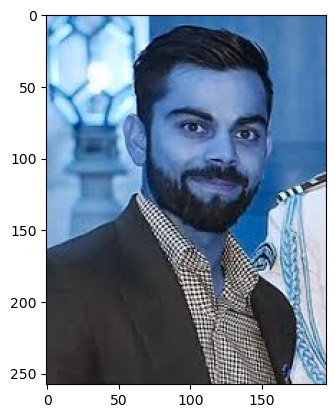

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(258, 195)

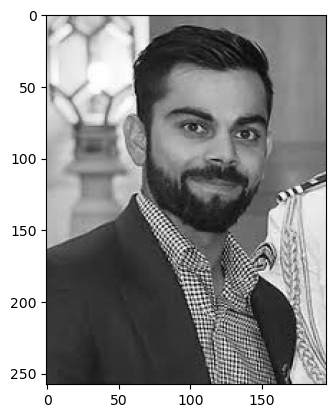

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier("C:/SportsPersonClassifier/model/opencv/haar cascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/SportsPersonClassifier/model/opencv/haar cascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 64,  37, 108, 108]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(64, 37, 108, 108)

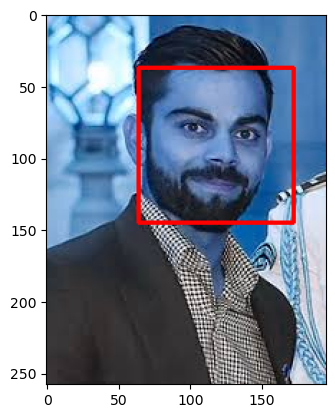

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

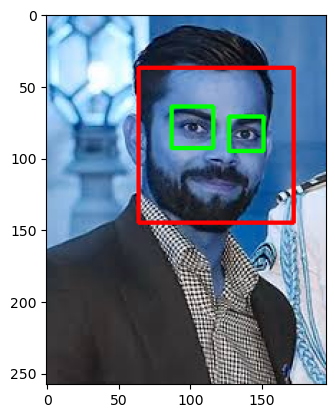

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

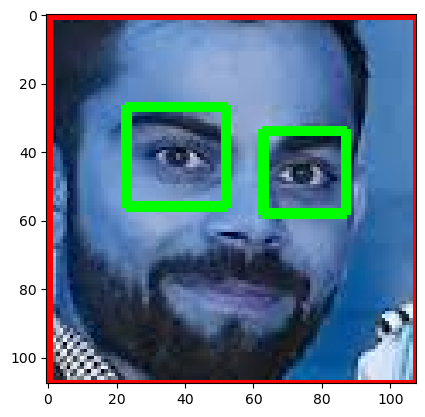

In [15]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

Cropped the facial region of the image if there are two eye in the face

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

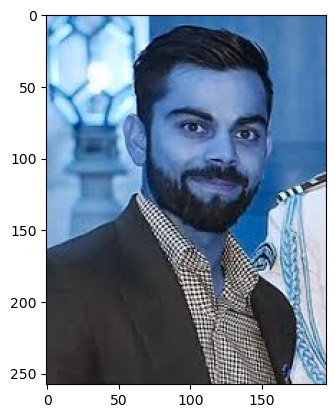

In [17]:
original_image = cv2.imread('C:/SportsPersonClassifier/model/test_images/virat.jpg')
plt.imshow(original_image)

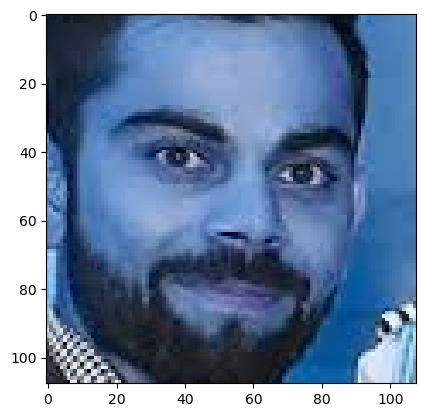

In [20]:
cropped_image = get_cropped_image_if_2_eyes('C:/SportsPersonClassifier/model/test_images/virat.jpg')
plt.imshow(cropped_image)

In [49]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [57]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.path != './datasets/.ipynb_checkpoints' :
        img_dirs.append(entry.path)

In [58]:
img_dirs

['./datasets/ABD',
 './datasets/Leone Messi',
 './datasets/MS Dhoni',
 './datasets/Ronaldo',
 './datasets/SKY',
 './datasets/virat kohli']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [59]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [64]:
cropped_image_dirs = []
celebraty_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebraty_name = img_dir.split('/')[-1]
    print(celebraty_name)
    
    celebraty_file_names_dict[celebraty_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebraty_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped folder image ",cropped_folder)
                
            cropped_file_name = celebraty_name + str(count) + ".png"
            cropped_file_path =  cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebraty_file_names_dict[celebraty_name].append(cropped_file_path)
            count+=1
            

ABD
generating cropped folder image  ./datasets/cropped/ABD
Leone Messi
generating cropped folder image  ./datasets/cropped/Leone Messi
MS Dhoni
generating cropped folder image  ./datasets/cropped/MS Dhoni
Ronaldo
generating cropped folder image  ./datasets/cropped/Ronaldo
SKY
generating cropped folder image  ./datasets/cropped/SKY
virat kohli
generating cropped folder image  ./datasets/cropped/virat kohli


Use wavelet transform as a feature for training our model

In [65]:
# wavelet transform

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

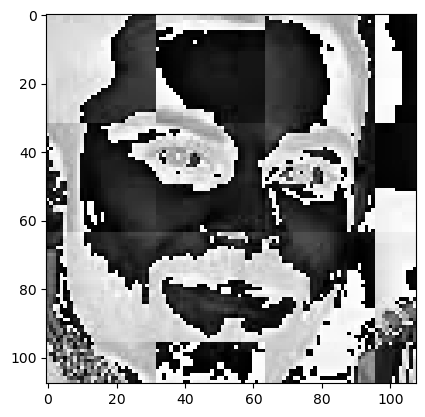

In [67]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [68]:
celebraty_file_names_dict

{'ABD': ['./datasets/cropped/ABD/ABD1.png',
  './datasets/cropped/ABD/ABD2.png',
  './datasets/cropped/ABD/ABD3.png',
  './datasets/cropped/ABD/ABD4.png',
  './datasets/cropped/ABD/ABD5.png',
  './datasets/cropped/ABD/ABD6.png',
  './datasets/cropped/ABD/ABD7.png',
  './datasets/cropped/ABD/ABD8.png',
  './datasets/cropped/ABD/ABD9.png',
  './datasets/cropped/ABD/ABD10.png',
  './datasets/cropped/ABD/ABD11.png',
  './datasets/cropped/ABD/ABD12.png',
  './datasets/cropped/ABD/ABD13.png',
  './datasets/cropped/ABD/ABD14.png',
  './datasets/cropped/ABD/ABD15.png',
  './datasets/cropped/ABD/ABD16.png',
  './datasets/cropped/ABD/ABD17.png',
  './datasets/cropped/ABD/ABD18.png',
  './datasets/cropped/ABD/ABD19.png',
  './datasets/cropped/ABD/ABD20.png',
  './datasets/cropped/ABD/ABD21.png',
  './datasets/cropped/ABD/ABD22.png'],
 'Leone Messi': ['./datasets/cropped/Leone Messi/Leone Messi1.png',
  './datasets/cropped/Leone Messi/Leone Messi2.png',
  './datasets/cropped/Leone Messi/Leone Mess

In [70]:
class_dict = {}
count = 0
for celebrity_name in celebraty_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ABD': 0,
 'Leone Messi': 1,
 'MS Dhoni': 2,
 'Ronaldo': 3,
 'SKY': 4,
 'virat kohli': 5}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [75]:
X = []
y = []

for celebraty_name, training_files in celebraty_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combine_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combine_img)
        y.append(class_dict[celebraty_name])
        

In [78]:
len(X[0])

4096

In [77]:
len(y)

175

In [79]:
X[0]

array([[85],
       [78],
       [75],
       ...,
       [74],
       [ 0],
       [ 1]], dtype=uint8)

In [80]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(175, 4096)

In [82]:
X[0]

array([85., 78., 75., ..., 74.,  0.,  1.])

Training the model

In [83]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [86]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7045454545454546

In [87]:
len(X_test)

44

In [88]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.40      0.57         5
           2       0.67      0.60      0.63        10
           3       0.69      0.82      0.75        11
           4       0.60      0.60      0.60         5
           5       0.67      1.00      0.80         8

    accuracy                           0.70        44
   macro avg       0.77      0.67      0.68        44
weighted avg       0.74      0.70      0.69        44



gridsearch cv to hypertunining

In [89]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [94]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
         }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [96]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.679772,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.533618,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.701994,{'logisticregression__C': 1}


In [97]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [98]:
best_estimators['svm'].score(X_test,y_test)

0.7272727272727273

In [99]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7727272727272727

In [101]:
 best_clf = best_estimators['logistic_regression']

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 0, 1, 0, 0, 0],
       [0, 4, 1, 0, 0, 0],
       [1, 0, 7, 1, 1, 0],
       [0, 0, 0, 8, 3, 0],
       [0, 0, 1, 0, 4, 0],
       [0, 0, 0, 0, 1, 7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

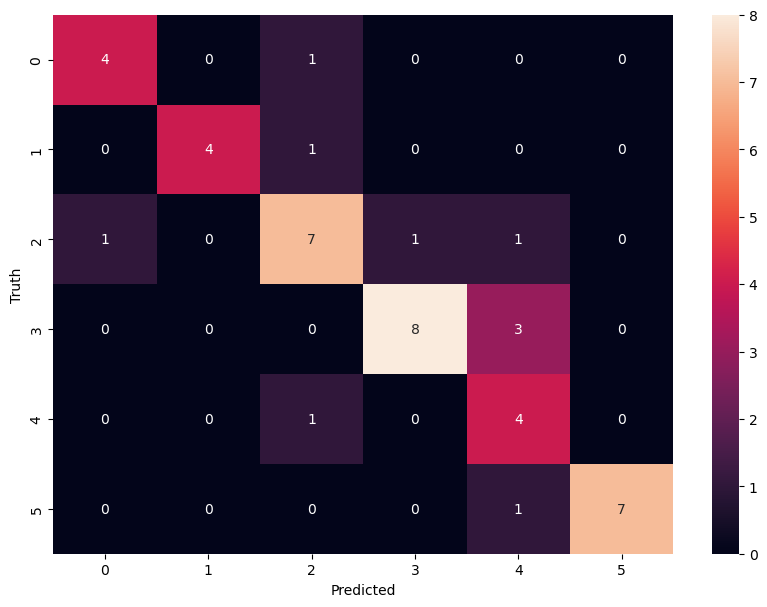

In [103]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Save the trained model

In [104]:
!pip install joblib
import joblib
# save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

Save class dictionary

In [105]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))